# imports

Populating the interactive namespace from numpy and matplotlib
3665


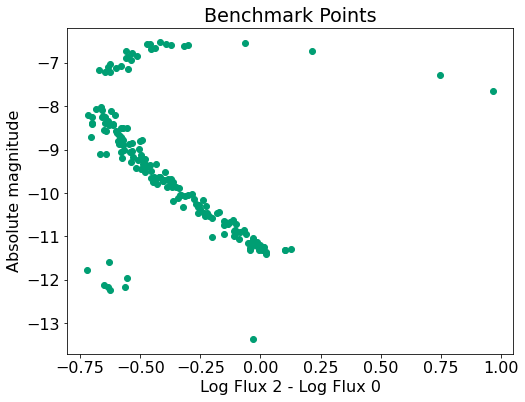

In [6]:
# import required libraries
import os
import numpy as np
import scipy as sp
import matplotlib as mpl
from astropy.table import Table
import glob
import warnings

# configure notebook for plotting
%pylab inline --no-import-all 
mpl.style.use('seaborn-colorblind') # colourblind-friendly colour scheme
colours = mpl.rcParams['axes.prop_cycle'].by_key()['color'] # allows access to colours
# subsequent lines default plot settings
matplotlib.rcParams['image.origin'] = 'lower'
matplotlib.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
matplotlib.rcParams['font.size']=16              #10 
matplotlib.rcParams['savefig.dpi']= 300             #72 

warnings.filterwarnings('ignore')

# import data from Data directory
allPointsFiles = glob.glob('../Data/*/*/points.txt')
allFuzzyFiles = glob.glob('../Data/*/*/fuzzy.txt')
closePoints = []
totalPoints = 0

# take all close points as reference and plot

fig = plt.figure()
plt.ylabel('Absolute magnitude')
plt.xlabel('Log Flux 2 - Log Flux 0')
plt.title('Benchmark Points')

for j, pointsFile in enumerate(allPointsFiles):
    try:
        this = Table.read(pointsFile,format='ascii')
        totalPoints= totalPoints+len(this)
        thispar = this['par']
        thism0, thism1, thism2 = (np.log10(this['flux1']), 
                                  np.log10(this['flux2']), 
                                  np.log10(this['flux3']))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist)
        
        points = Table([this['name'], thispar, thiscolour, abs_mag]).as_array().tolist()
        
        
        for point in points:
            if point[1] > 0.01:
                closePoints.append(point)
                plt.scatter(point[2],point[3],color=colours[1])
    except:
        pass
    
print(totalPoints)    

Text(0.5, 0, 'Log Flux 2 - Log Flux 0')

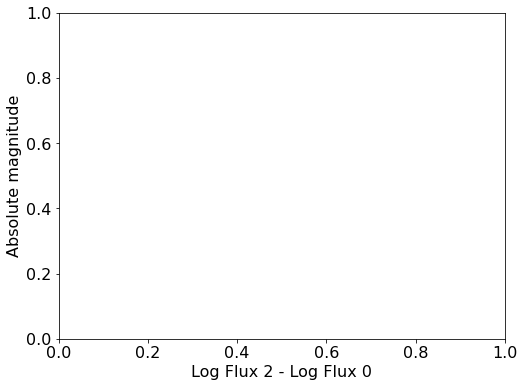